<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap01/1_1_BackgroundMathematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Notebook 1.1 -- Background Mathematics**

The purpose of this Python notebook is to make sure you can use CoLab and to familiarize yourself with some of the background mathematical concepts that you are going to need to understand deep learning. <br><br> It's not meant to be difficult and it may be that you know some or all of this information already.<br><br> Math is *NOT* a spectator sport.  You won't learn it by just listening to lectures or reading books.  It really helps to interact with it and explore yourself. <br><br> Work through the cells below, running each cell in turn.  In various places you will see the words **"TODO"**. Follow the instructions at these places and write code to complete the functions.  There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [23]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

**Linear functions**<br> We will be using the term *linear equation* to mean a weighted sum of inputs plus an offset. If there is just one input $x$, then this is a straight line:

\begin{equation}y=\beta+\omega x,\end{equation}

where $\beta$ is the y-intercept of the linear and $\omega$ is the slope of the line. When there are two inputs $x_{1}$ and $x_{2}$, then this becomes:

\begin{equation}y=\beta+\omega_1 x_1 + \omega_2 x_2.\end{equation}

Any other functions are by definition **non-linear**.




In [24]:
# Define a linear function with just one input, x
def linear_function_1D(x,beta,omega):
  # Linear equation: y = beta + omega * x
  y = beta + omega * x

  return y

In [ ]:
# Better Interactive 1D Linear Function (Compatible Version)

# Import required libraries
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Use inline backend for better compatibility
%matplotlib inline

class Interactive1DPlot:
    def __init__(self):
        # Create output widget to control display
        self.output = widgets.Output()
        
        # Define x values
        self.x = np.arange(0.0, 10.0, 0.01)
        
        # Create sliders
        self.beta_slider = widgets.FloatSlider(
            value=0.0, min=-10.0, max=10.0, step=0.1,
            description='β (y-intercept):',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='400px')
        )
        
        self.omega_slider = widgets.FloatSlider(
            value=1.0, min=-3.0, max=3.0, step=0.1,
            description='ω (slope):',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='400px')
        )
        
        # Connect sliders to update function
        self.beta_slider.observe(self.update_plot, names='value')
        self.omega_slider.observe(self.update_plot, names='value')
        
        # Display interface
        self.interface = widgets.VBox([
            self.beta_slider, 
            self.omega_slider, 
            self.output
        ])
        
        # Initial plot
        self.update_plot()
        
        # Display the interface
        display(self.interface)
    
    def update_plot(self, change=None):
        # Clear previous output
        with self.output:
            clear_output(wait=True)
            
            # Get current values
            beta = self.beta_slider.value
            omega = self.omega_slider.value
            
            # Compute new y values
            y = linear_function_1D(self.x, beta, omega)
            
            # Create the plot
            fig, ax = plt.subplots(figsize=(8, 6))
            ax.plot(self.x, y, 'r-', linewidth=2, label=f'y = {beta:.1f} + {omega:.1f}x')
            
            # Set up the plot
            ax.set_ylim([-10, 20])
            ax.set_xlim([0, 10])
            ax.set_xlabel('x', fontsize=12)
            ax.set_ylabel('y', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
            ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
            ax.legend(fontsize=12)
            ax.set_title(f'Interactive 1D Linear Function: y = {beta:.1f} + {omega:.1f}x', fontsize=14)
            
            plt.tight_layout()
            plt.show()

# Create the interactive plot
plot1d = Interactive1DPlot()


**Interactive Linear Function Explorer**

Use the sliders above to explore how the parameters β (beta) and ω (omega) affect the linear function:

- **β (beta)**: Controls the y-intercept - where the line crosses the y-axis
- **ω (omega)**: Controls the slope - how steep the line is
  - Positive values: line goes up from left to right
  - Negative values: line goes down from left to right
  - Zero: horizontal line

Try different combinations to see how they affect the line. Can you create a line that:
1. Crosses the y-axis at y = 5?
2. Has a slope of -2?
3. Passes through the point (5, 0)?


In [26]:
# Define a linear function with two inputs, x1 and x2
def linear_function_2D(x1, x2, beta, omega1, omega2):
    # 2D Linear equation: y = beta + omega1 * x1 + omega2 * x2
    y = beta + omega1 * x1 + omega2 * x2
    return y


In [27]:
# Code to draw 2D function -- helper function for visualization
def draw_2D_function(x1_mesh, x2_mesh, y):
    fig, ax = plt.subplots()
    fig.set_size_inches(7,7)
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')
    plt.show()


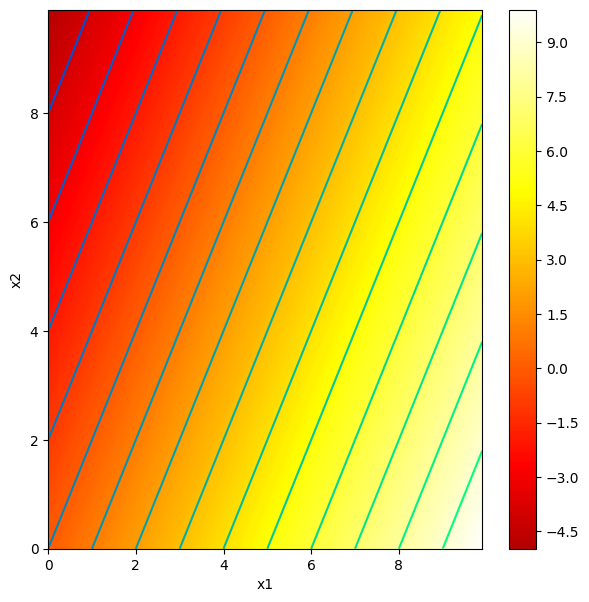

In [28]:
# Plot the 2D function (static example)

# Make 2D array of x and y points
x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Compute the 2D function for given values of omega1, omega2
beta = 0.0; omega1 = 1.0; omega2 = -0.5
y  = linear_function_2D(x1,x2,beta, omega1, omega2)

# Draw the function.
# Color represents y value (brighter = higher value)
# Black = -10 or less, White = +10 or more
# 0 = mid orange
# Lines are contours where value is equal
draw_2D_function(x1,x2,y)

# TODO
# Predict what this plot will look like if you set omega_1 to zero
# Change the code and see if you are right.

# TODO
# Predict what this plot will look like if you set omega_2 to zero
# Change the code and see if you are right.

# TODO
# Predict what this plot will look like if you set beta to -5
# Change the code and see if you are correct


Now let's investigate a 2D linear function

In [29]:
# Better Interactive 2D Linear Function (Compatible Version)

class Interactive2DPlot:
    def __init__(self):
        # Create output widget to control display
        self.output = widgets.Output()
        
        # Define mesh grid
        x1 = np.arange(0.0, 10.0, 0.1)
        x2 = np.arange(0.0, 10.0, 0.1)
        self.x1_mesh, self.x2_mesh = np.meshgrid(x1, x2)
        
        # Create sliders
        self.beta_slider = widgets.FloatSlider(
            value=0.0, min=-5.0, max=5.0, step=0.1,
            description='β (intercept):',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='400px')
        )
        
        self.omega1_slider = widgets.FloatSlider(
            value=1.0, min=-2.0, max=2.0, step=0.1,
            description='ω₁ (x1 coeff):',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='400px')
        )
        
        self.omega2_slider = widgets.FloatSlider(
            value=-0.5, min=-2.0, max=2.0, step=0.1,
            description='ω₂ (x2 coeff):',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='400px')
        )
        
        # Connect sliders to update function
        self.beta_slider.observe(self.update_plot, names='value')
        self.omega1_slider.observe(self.update_plot, names='value')
        self.omega2_slider.observe(self.update_plot, names='value')
        
        # Display interface
        self.interface = widgets.VBox([
            self.beta_slider, 
            self.omega1_slider, 
            self.omega2_slider,
            self.output
        ])
        
        # Initial plot
        self.update_plot()
        
        # Display the interface
        display(self.interface)
    
    def update_plot(self, change=None):
        # Clear previous output
        with self.output:
            clear_output(wait=True)
            
            # Get current values
            beta = self.beta_slider.value
            omega1 = self.omega1_slider.value
            omega2 = self.omega2_slider.value
            
            # Compute new y values
            y = linear_function_2D(self.x1_mesh, self.x2_mesh, beta, omega1, omega2)
            
            # Create the plot
            fig, ax = plt.subplots(figsize=(9, 7))
            
            # Create contour plot with colormap
            contour_filled = ax.contourf(self.x1_mesh, self.x2_mesh, y, 
                                       levels=256, cmap='hot', vmin=-10, vmax=10)
            
            # Add colorbar
            fig.colorbar(contour_filled, ax=ax)
            
            # Add contour lines
            levels = np.arange(-10, 10, 1.0)
            ax.contour(self.x1_mesh, self.x2_mesh, y, levels, 
                      colors='black', alpha=0.4, linewidths=0.5)
            
            # Set labels and title
            ax.set_xlabel('x1', fontsize=12)
            ax.set_ylabel('x2', fontsize=12)
            ax.set_title(f'Interactive 2D Linear Function: y = {beta:.1f} + {omega1:.1f}x₁ + {omega2:.1f}x₂', 
                        fontsize=14)
            
            plt.tight_layout()
            plt.show()

# Create the interactive 2D plot
plot2d = Interactive2DPlot()


**Interactive 2D Linear Function Explorer**

Use the sliders above to explore how the parameters affect the 2D linear function:

- **β (beta)**: Controls the overall offset/height of the plane
  - Positive values: shift the entire plane upward
  - Negative values: shift the entire plane downward
  - Zero: plane passes through the origin (when x₁=0, x₂=0)

- **ω₁ (omega1)**: Controls how the function changes with respect to x₁
  - Positive values: function increases as x₁ increases (left to right)
  - Negative values: function decreases as x₁ increases
  - Zero: function doesn't depend on x₁ (vertical stripes)

- **ω₂ (omega2)**: Controls how the function changes with respect to x₂
  - Positive values: function increases as x₂ increases (bottom to top)
  - Negative values: function decreases as x₂ increases
  - Zero: function doesn't depend on x₂ (horizontal stripes)

**Color Interpretation:**
- **Black**: y ≤ -10 (lowest values)
- **Dark Red/Orange**: y ≈ 0 (middle values)
- **Bright Yellow/White**: y ≥ 10 (highest values)
- **Contour Lines**: Connect points with equal y values

**Experiments to Try:**
1. Set ω₁ = 0 and observe vertical stripes
2. Set ω₂ = 0 and observe horizontal stripes
3. Set β = -5 and see how the entire plane shifts
4. Make both ω₁ and ω₂ positive vs. one positive and one negative


Often we will want to compute many linear functions at the same time.  For example, we might have three inputs, $x_1$, $x_2$, and $x_3$ and want to compute two linear functions giving $y_1$ and $y_2$. Of course, we could do this by just running each equation separately,<br><br>

\begin{align}y_1 &=& \beta_1 + \omega_{11} x_1 + \omega_{12} x_2 + \omega_{13} x_3\\
y_2 &=& \beta_2 + \omega_{21} x_1 + \omega_{22} x_2 + \omega_{23} x_3.
\end{align}

However, we can write it more compactly with vectors and matrices:

\begin{equation}
\begin{bmatrix} y_1\\ y_2 \end{bmatrix} = \begin{bmatrix}\beta_{1}\\\beta_{2}\end{bmatrix}+ \begin{bmatrix}\omega_{11}&\omega_{12}&\omega_{13}\\\omega_{21}&\omega_{22}&\omega_{23}\end{bmatrix}\begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix},
\end{equation}
or

\begin{equation}
\mathbf{y} = \boldsymbol\beta +\boldsymbol\Omega\mathbf{x}.
\end{equation}

for short.  Here, lowercase bold symbols are used for vectors.  Upper case bold symbols are used for matrices.



In [10]:
# Define a linear function with three inputs, x1, x2, and x_3
def linear_function_3D(x1,x2,x3,beta,omega1,omega2,omega3):
  # TODO -- replace the code below with formula for a single 3D linear equation
  y = x1

  return y

Let's compute two linear equations, using both the individual equations and the vector / matrix form and check they give the same result

In [11]:
# Define the parameters
beta1 = 0.5; beta2 = 0.2
omega11 =  -1.0 ; omega12 = 0.4; omega13 = -0.3
omega21 =  0.1  ; omega22 = 0.1; omega23 = 1.2

# Define the inputs
x1 = 4 ; x2 =-1; x3 = 2

# Compute using the individual equations
y1 = linear_function_3D(x1,x2,x3,beta1,omega11,omega12,omega13)
y2 = linear_function_3D(x1,x2,x3,beta2,omega21,omega22,omega23)
print("Individual equations")
print('y1 = %3.3f\ny2 = %3.3f'%((y1,y2)))

# Define vectors and matrices
beta_vec = np.array([[beta1],[beta2]])
omega_mat = np.array([[omega11,omega12,omega13],[omega21,omega22,omega23]])
x_vec = np.array([[x1], [x2], [x3]])

# Compute with vector/matrix form
y_vec = beta_vec+np.matmul(omega_mat, x_vec)
print("Matrix/vector form")
print('y1= %3.3f\ny2 = %3.3f'%((y_vec[0][0],y_vec[1][0])))


Individual equations
y1 = 4.000
y2 = 4.000
Matrix/vector form
y1= -4.500
y2 = 2.900


# Questions

1.  A single linear equation with three inputs (i.e. **linear_function_3D()**) associates a value y with each point in a 3D space ($x_1$,$x_2$,$x_3$).  Is it possible to visualize this?   What value is at position (0,0,0)?

2.  Write code to compute three linear equations with two inputs ($x_1$, $x_2$) using both the individual equations and the matrix form (you can make up any values for the inputs $\beta_{i}$ and the slopes $\omega_{ij}$.

# Special functions

Throughout the book, we'll be using some special functions (see Appendix B.1.3).  The most important of these are the logarithm and exponential functions.  Let's investigate their properties.

We'll start with the exponential function $y=\exp[x]=e^x$ which maps the real line $[-\infty,+\infty]$ to non-negative numbers $[0,+\infty]$.

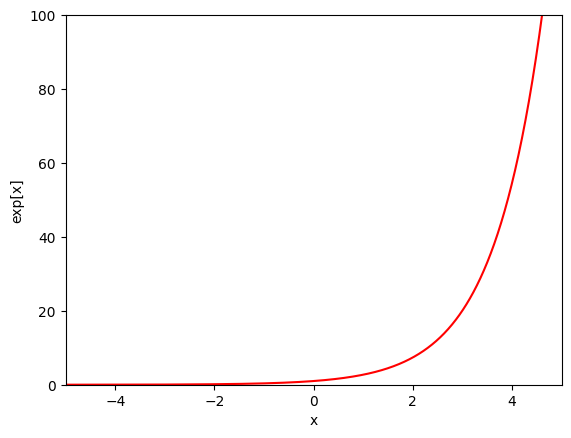

In [30]:
# Draw the exponential function

# Define an array of x values from -5 to 5 with increments of 0.01
x = np.arange(-5.0,5.0, 0.01)
y = np.exp(x) ;

# Plot this function
fig, ax = plt.subplots()
ax.plot(x,y,'r-')
ax.set_ylim([0,100]);ax.set_xlim([-5,5])
ax.set_xlabel('x'); ax.set_ylabel('exp[x]')
plt.show()

# Questions

1. What is $\exp[0]$?  
2. What is $\exp[1]$?
3. What is $\exp[-\infty]$?
4. What is $\exp[+\infty]$?
5. A function is convex if we can draw a straight line between any two points on the function, and the line lies above the function everywhere between these two points. Similarly, a function is concave if a straight line between any two points lies below the function everywhere between these two points.  Is the exponential function convex or concave or neither?


Now let's consider the logarithm function $y=\log[x]$. Throughout the book we always use natural (base $e$) logarithms. The log function maps non-negative numbers $[0,\infty]$ to real numbers $[-\infty,\infty]$.  It is the inverse of the exponential function.  So when we compute $\log[x]$ we are really asking "What is the number $y$ so that $e^y=x$?"

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_23427/3554907627.py:11: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('x'); ax.set_ylabel('$\log[x]$')


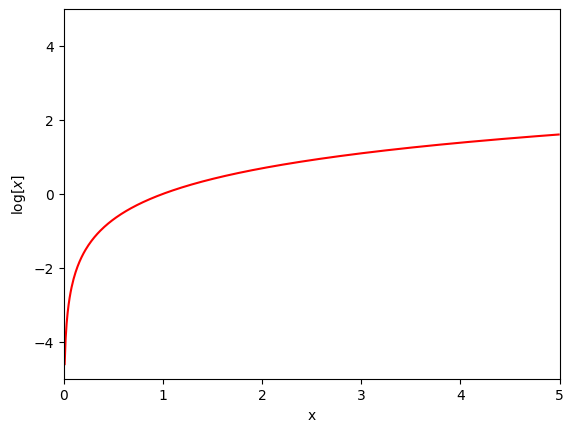

In [31]:
# Draw the logarithm function

# Define an array of x values from -5 to 5 with increments of 0.01
x = np.arange(0.01,5.0, 0.01)
y = np.log(x) ;

# Plot this function
fig, ax = plt.subplots()
ax.plot(x,y,'r-')
ax.set_ylim([-5,5]);ax.set_xlim([0,5])
ax.set_xlabel('x'); ax.set_ylabel('$\log[x]$')
plt.show()

# Questions

1. What is $\log[0]$?  
2. What is $\log[1]$?
3. What is $\log[e]$?
4. What is $\log[\exp[3]]$?
5. What is $\exp[\log[4]]$?
6. What is $\log[-1]$?
7. Is the logarithm function concave or convex?
